In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

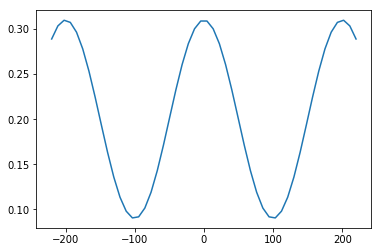

In [53]:
def frange(x, amplitude, offset, centre, largeur):
    return offset + amplitude*np.cos(2*np.pi*(x-centre)/largeur)

amplitude_0 = 0.11
offset_0 = 0.2
centre_0 = 0
largeur_0 = 200

x = np.linspace(-220, 220)
plt.plot(x, frange(x,  amplitude_0, offset_0, centre_0, largeur_0))

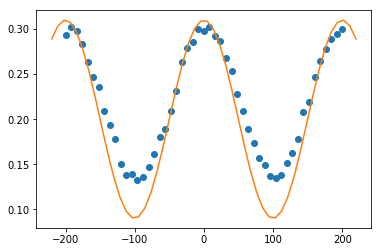

In [54]:
data_freq, data_y = np.loadtxt('data/fit_sinus.dat', unpack=True)
plt.plot(data_freq, data_y, 'o')
plt.plot(x, frange(x,  amplitude_0, offset_0, centre_0, largeur_0))

Text(0,0.5,'Amplitude (u.a.)')

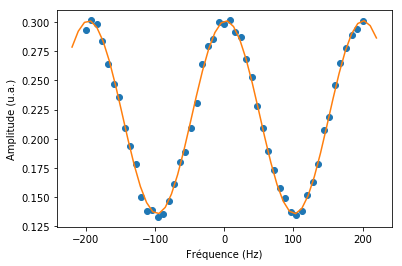

In [57]:
from scipy.optimize import curve_fit

p_ini = [amplitude_0, offset_0, centre_0, largeur_0]
p_opt, p_cov = curve_fit(frange, data_freq, data_y, p_ini)

plt.plot(data_freq, data_y, 'o')
plt.plot(x, frange(x, *p_opt))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude (u.a.)')

In [58]:
p_cov

array([[6.62971421e-07, 6.42451197e-09, 1.09866115e-06, 6.10915626e-05],
       [6.42451197e-09, 3.93151961e-07, 7.35852968e-07, 1.46820527e-04],
       [1.09866115e-06, 7.35852968e-07, 1.00116291e-01, 5.79026750e-04],
       [6.10915626e-05, 1.46820527e-04, 5.79026750e-04, 3.71813107e-01]])

In [59]:
sigma_freq = np.sqrt(p_cov[2, 2])
sigma_freq

0.3164115846889373

In [60]:
uncertainties = np.array([np.sqrt(np.diag(p_cov))])
corr_coef = p_cov/np.dot(uncertainties.transpose(), uncertainties)
corr_coef

array([[1.        , 0.01258382, 0.00426446, 0.12304713],
       [0.01258382, 1.        , 0.00370901, 0.38401148],
       [0.00426446, 0.00370901, 1.        , 0.00300112],
       [0.12304713, 0.38401148, 0.00300112, 1.        ]])

### Corrélation

In [64]:
np.random.seed(0)
N = 100
x = np.linspace(2000, 2018, N)
y = np.arange(N)*0.2+45+np.random.normal(size=N)

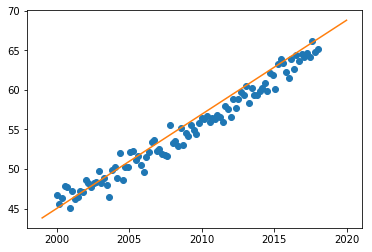

In [65]:
def fonction_fit(x, a, b):
    return a*x + b

plt.plot(x, y, 'o')
x_plot = np.linspace(1999, 2020)
plt.plot(x_plot, fonction_fit(x_plot, 1.19, -2335))

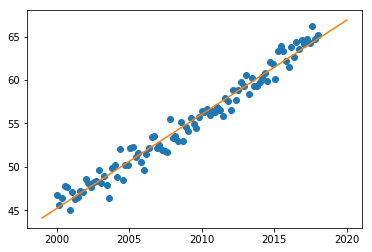

In [66]:
p_opt, p_cov = curve_fit(fonction_fit, x, y)

plt.plot(x, y, 'o')
x_plot = np.linspace(1999, 2020)
plt.plot(x_plot, fonction_fit(x_plot, *p_opt))

In [69]:
p_cov
sigma_a = np.sqrt(p_cov[0, 0])
sigma_b = np.sqrt(p_cov[1, 1])
cov_ab = p_cov[0, 1]
corr_coef_ab = cov_ab/(sigma_a*sigma_b)
print(sigma_b)
print(corr_coef_ab)

38.82760655342526
-0.999996587616246


(-2500, 500)

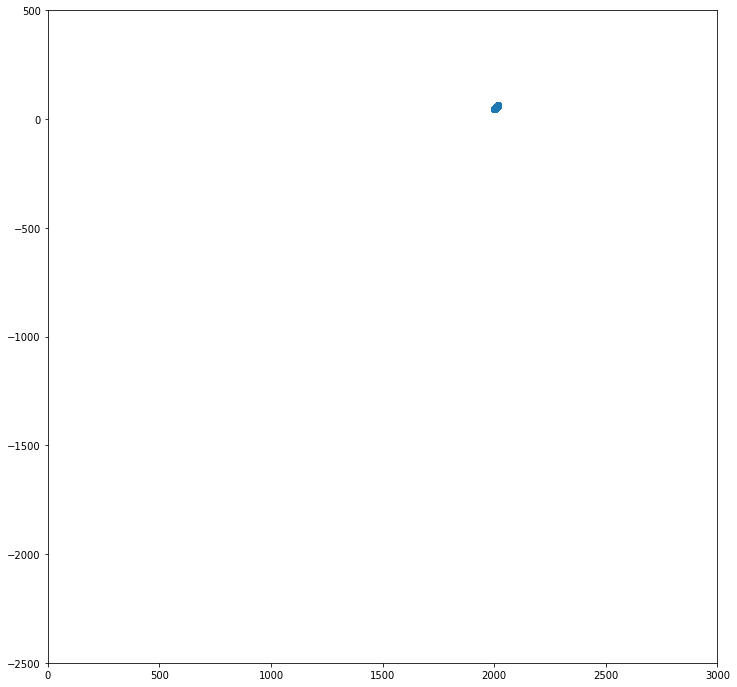

In [72]:
plt.figure(figsize=(12, 12))
plt.plot(x, y, 'o')
plt.xlim(0, 3000)
plt.ylim(-2500, 500 )

In [75]:
a_opt, b_opt = p_opt
sigma_a = np.sqrt(p_cov[0, 0])
sigma_b = np.sqrt(p_cov[1, 1])
cov_ab = p_cov[0, 1]

x = 2010
y = a_opt*x + b_opt
print(y)
sigma_y_carre = sigma_a**2*x**2 + sigma_b**2 + 2*x*cov_ab
print(np.sqrt(sigma_y_carre))

56.04328983428377
0.10325902606783537


In [79]:
np.random.seed(0)
N = 100
x = np.linspace(2000, 2018, N)
y = np.arange(N)*0.2+45+np.random.normal(size=N)

def fonction_fit(x, a, b):
    return a*(x - 2009) + b
p_opt, p_cov = curve_fit(fonction_fit, x, y)

sigma_a = np.sqrt(p_cov[0, 0])
sigma_b = np.sqrt(p_cov[1, 1])
cov_ab = p_cov[0, 1]
corr_coef_ab = cov_ab/(sigma_a*sigma_b)
print(sigma_b)
print(corr_coef_ab)

0.10143414767017182
6.0112359691355954e-12


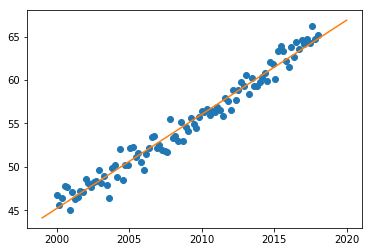

In [83]:
np.random.seed(0)
N = 100
x = np.linspace(2000, 2018, N)
y = np.arange(N)*0.2+45+np.random.normal(size=N)

def fonction_fit(x, a, b, x0):
    return a*(x - x0) + b
p_opt, p_cov = curve_fit(fonction_fit, x, y)

plt.plot(x, y, 'o')
x_plot = np.linspace(1999, 2020)
plt.plot(x_plot, fonction_fit(x_plot, *p_opt))

In [85]:
p_cov

array([[ 3.76717705e-04,  1.28600495e+04,  1.18531999e+04],
       [ 1.28858456e+04, -2.52070081e+14, -2.32648853e+14],
       [ 1.18770085e+04, -2.32648852e+14, -2.14723969e+14]])